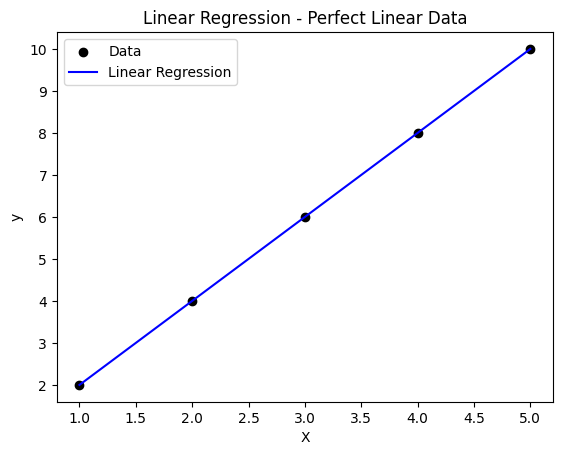

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# داده خطی
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])  # کاملاً خطی

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, color='black', label='Data')
plt.plot(X, y_pred, color='blue', label='Linear Regression')
plt.title('Linear Regression - Perfect Linear Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


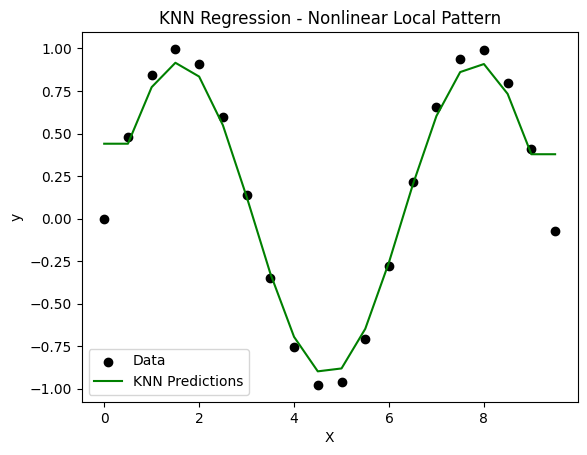

In [15]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# داده غیرخطی (sin)
X = np.arange(0, 10, 0.5).reshape(-1, 1)
y = np.sin(X).ravel()

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, color='black', label='Data')
plt.plot(X, y_pred, color='green', label='KNN Predictions')
plt.title('KNN Regression - Nonlinear Local Pattern')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


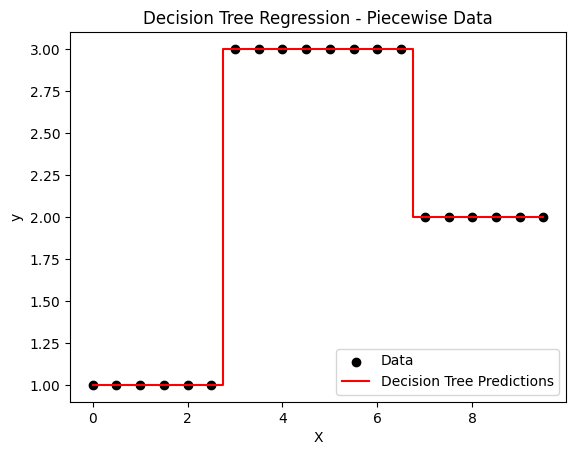

In [16]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# داده قطعه‌ای (piecewise)
X = np.arange(0, 10, 0.5).reshape(-1, 1)
y = np.array([1 if x < 3 else 3 if x < 7 else 2 for x in X.ravel()])

model = DecisionTreeRegressor()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, color='black', label='Data')
plt.step(X, y_pred, color='red', label='Decision Tree Predictions', where='mid')
plt.title('Decision Tree Regression - Piecewise Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


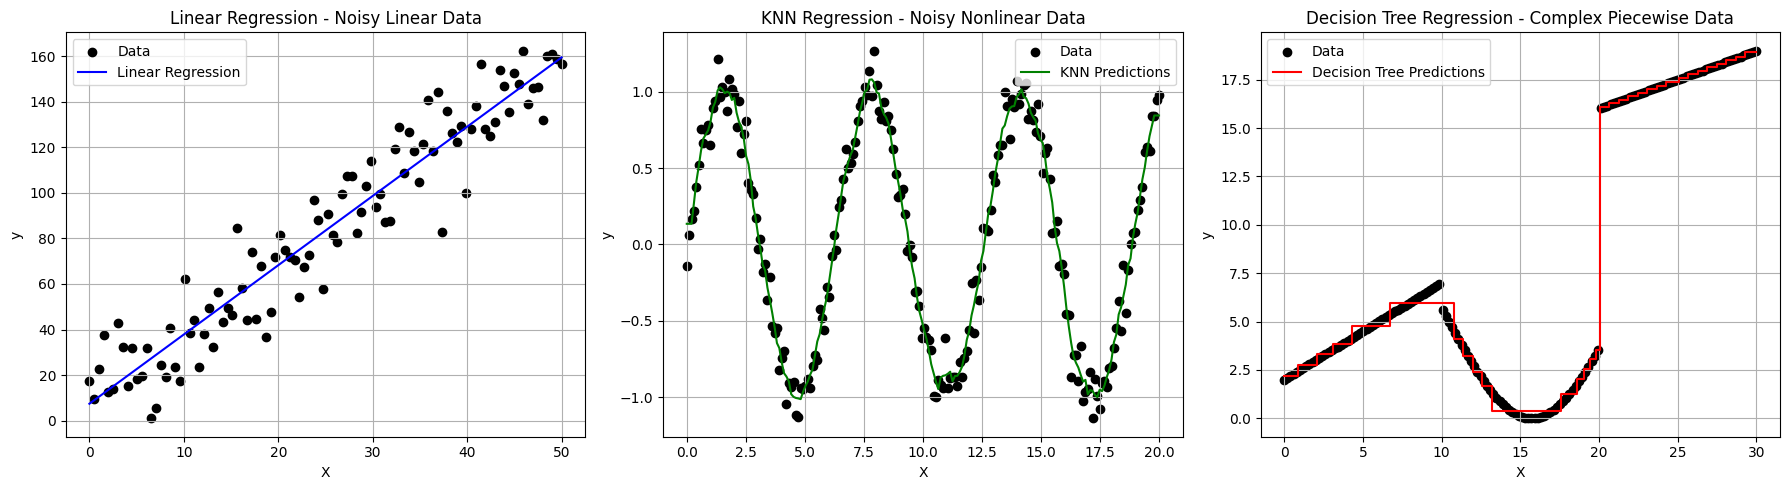

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)

# ---- Linear Regression - داده خطی ولی نویزدار ----
X_lin = np.linspace(0, 50, 100).reshape(-1,1)
y_lin = 3 * X_lin.ravel() + 10 + np.random.normal(0, 15, 100)  # خطی + نویز

lr = LinearRegression()
lr.fit(X_lin, y_lin)
y_pred_lin = lr.predict(X_lin)

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(X_lin, y_lin, color='black', label='Data')
plt.plot(X_lin, y_pred_lin, color='blue', label='Linear Regression')
plt.title('Linear Regression - Noisy Linear Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# ---- KNN - داده غیرخطی و پیچیده (محلی) ----
X_knn = np.linspace(0, 20, 200).reshape(-1,1)
y_knn = np.sin(X_knn).ravel() + np.random.normal(0, 0.1, 200)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_knn, y_knn)
y_pred_knn = knn.predict(X_knn)

plt.subplot(1,3,2)
plt.scatter(X_knn, y_knn, color='black', label='Data')
plt.plot(X_knn, y_pred_knn, color='green', label='KNN Predictions')
plt.title('KNN Regression - Noisy Nonlinear Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# ---- Decision Tree - داده قطعه‌ای پیچیده ----
X_tree = np.linspace(0, 30, 150).reshape(-1,1)
y_tree = np.piecewise(X_tree.ravel(),
                      [X_tree.ravel()<10, (X_tree.ravel()>=10)&(X_tree.ravel()<20), X_tree.ravel()>=20],
                      [lambda x: x*0.5 + 2,
                       lambda x: 5*np.sin(x*0.3)+5,
                       lambda x: 0.3*x + 10])

tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_tree, y_tree)
y_pred_tree = tree.predict(X_tree)

plt.subplot(1,3,3)
plt.scatter(X_tree, y_tree, color='black', label='Data')
plt.step(X_tree, y_pred_tree, color='red', label='Decision Tree Predictions', where='mid')
plt.title('Decision Tree Regression - Complex Piecewise Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Linear Regression MSE: 45.7060255990128
KNN Regression MSE: 700.9930172471719
Decision Tree MSE: 359.2941646589252


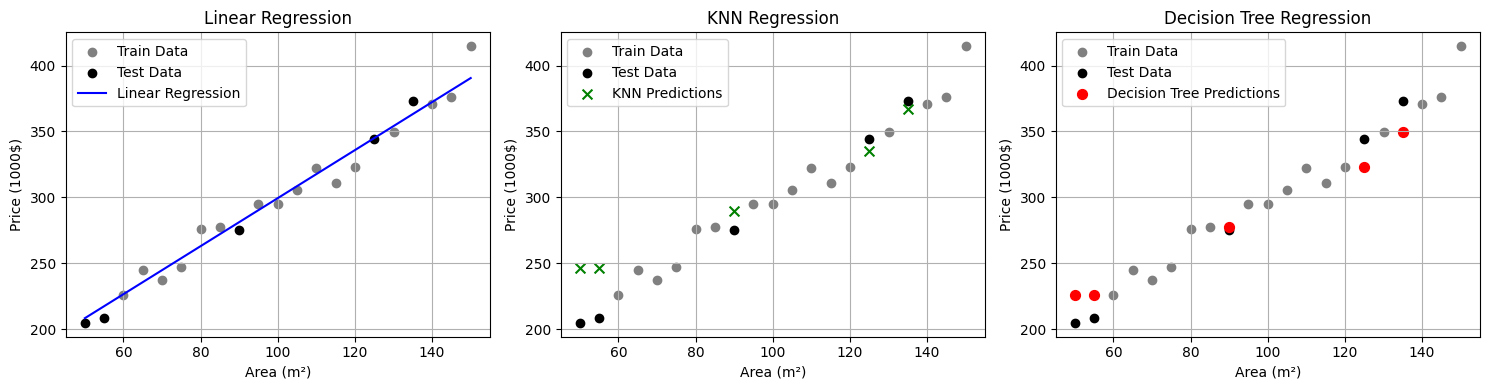


House area: 85 m²
  Linear Regression prediction: 272.21k$
  KNN prediction: 266.84k$
  Decision Tree prediction: 277.67k$

House area: 95 m²
  Linear Regression prediction: 290.41k$
  KNN prediction: 299.25k$
  Decision Tree prediction: 295.43k$

House area: 115 m²
  Linear Regression prediction: 326.80k$
  KNN prediction: 322.25k$
  Decision Tree prediction: 310.87k$

House area: 140 m²
  Linear Regression prediction: 372.30k$
  KNN prediction: 366.82k$
  Decision Tree prediction: 370.92k$


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ---- دیتاست بزرگتر ----
# متراژ (m²) و قیمت (1000$)
np.random.seed(42)
areas = np.arange(50, 151, 5)  # 50 تا 150 متر، هر 5 متر
prices = 100 + areas * 2 + np.random.normal(0, 10, len(areas))  # اضافه کردن نویز

df = pd.DataFrame({'area': areas, 'price': prices})
X = df[['area']].values
y = df['price'].values

# ---- تقسیم داده train/test (80% train, 20% test) ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- مدل‌ها ----
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=5)
tree = DecisionTreeRegressor(random_state=42)

# ---- آموزش مدل‌ها ----
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
tree.fit(X_train, y_train)

# ---- پیش‌بینی روی بخش تست ----
y_pred_lr = lr.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_tree = tree.predict(X_test)

# MSE
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("KNN Regression MSE:", mean_squared_error(y_test, y_pred_knn))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_tree))

# ---- رسم نمودارها ----
plt.figure(figsize=(15, 4))

# 1️⃣ Linear Regression
plt.subplot(131)
plt.scatter(X_train, y_train, color='gray', label='Train Data')
plt.scatter(X_test, y_test, color='black', label='Test Data')
plt.plot(X, lr.predict(X), color='blue', label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('Area (m²)')
plt.ylabel('Price (1000$)')
plt.legend()
plt.grid(True)

# 2️⃣ KNN Regression
plt.subplot(132)
plt.scatter(X_train, y_train, color='gray', label='Train Data')
plt.scatter(X_test, y_test, color='black', label='Test Data')
plt.scatter(X_test, y_pred_knn, color='green', label='KNN Predictions', s=50, marker='x')
plt.title('KNN Regression')
plt.xlabel('Area (m²)')
plt.ylabel('Price (1000$)')
plt.legend()
plt.grid(True)

# 3️⃣ Decision Tree Regression
plt.subplot(133)
plt.scatter(X_train, y_train, color='gray', label='Train Data')
plt.scatter(X_test, y_test, color='black', label='Test Data')
plt.scatter(X_test, y_pred_tree, color='red', label='Decision Tree Predictions', s=50, marker='o')
plt.title('Decision Tree Regression')
plt.xlabel('Area (m²)')
plt.ylabel('Price (1000$)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ---- پیش‌بینی خانه‌های جدید ----
new_areas = np.array([[85], [95], [115], [140]])  # خانه‌های جدید
pred_lr = lr.predict(new_areas)
pred_knn = knn.predict(new_areas)
pred_tree = tree.predict(new_areas)

for i, area in enumerate(new_areas.flatten()):
    print(f"\nHouse area: {area} m²")
    print(f"  Linear Regression prediction: {pred_lr[i]:.2f}k$")
    print(f"  KNN prediction: {pred_knn[i]:.2f}k$")
    print(f"  Decision Tree prediction: {pred_tree[i]:.2f}k$")
